#### Setup

In [1]:
import matplotlib as mpl

from bounded_rand_walkers.functions import Freehand, Gaussian
from bounded_rand_walkers.test_sampling import test_1d, test_2d


def Freehand2(*args, **kwargs):
    pdf = Freehand(*args, **kwargs)

    def scaled(pos):
        return pdf(2 * pos)

    return scaled


mpl.rc_file("matplotlibrc")

### Testing the 1D sampler

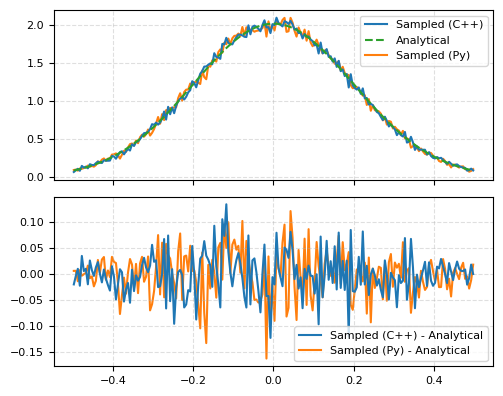

In [2]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(5, 4))
test_1d(
    cpp_pdf_name="gauss",
    python_pdf=Gaussian(width=0.2),
    N=int(1e5),
    seed=1,
    width=0.2,
    axes=axes,
)
fig.tight_layout()

#### Increasing the number of samples

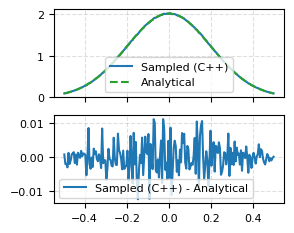

In [3]:
test_1d(N=int(1e7), seed=1)

### Testing the 2D sampler

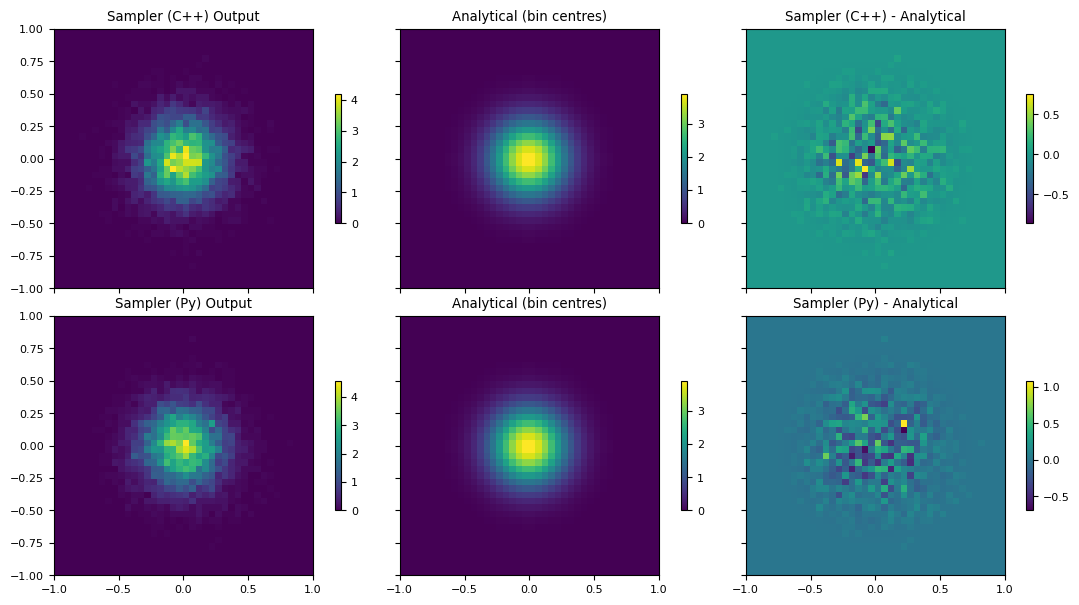

In [4]:
test_2d(
    cpp_pdf_name="gauss",
    python_pdf=Gaussian(width=0.2),
    N=int(1e4),
    bins=40,
    seed=1,
    width=0.2,
)
plt.gcf().tight_layout()

#### Increasing the number of samples

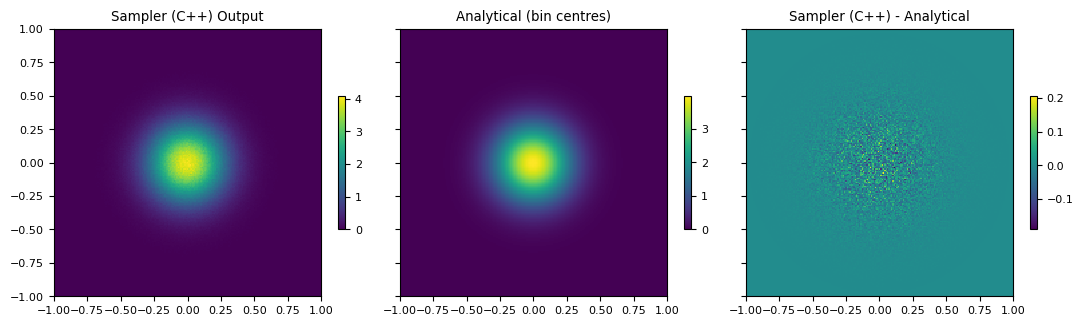

In [5]:
test_2d(cpp_pdf_name="gauss", bins=200, N=int(1e7), seed=1, width=0.2)
plt.gcf().tight_layout()

### Sample from the pdf used for Figure 5

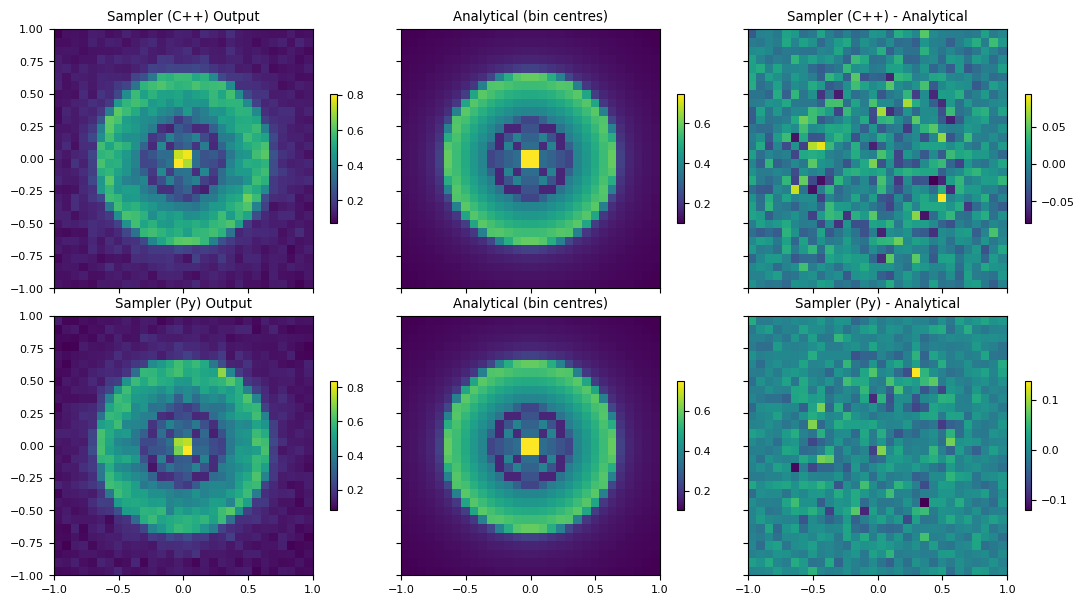

In [6]:
extent = 1
test_2d(
    cpp_pdf_name="freehand2",
    python_pdf=Freehand2(width=2.0),
    bins=30,
    xlim=(-extent, extent),
    ylim=(-extent, extent),
    width=2.0,
    N=int(1e5),
    seed=1,
)
plt.gcf().tight_layout()

#### Increased `N`

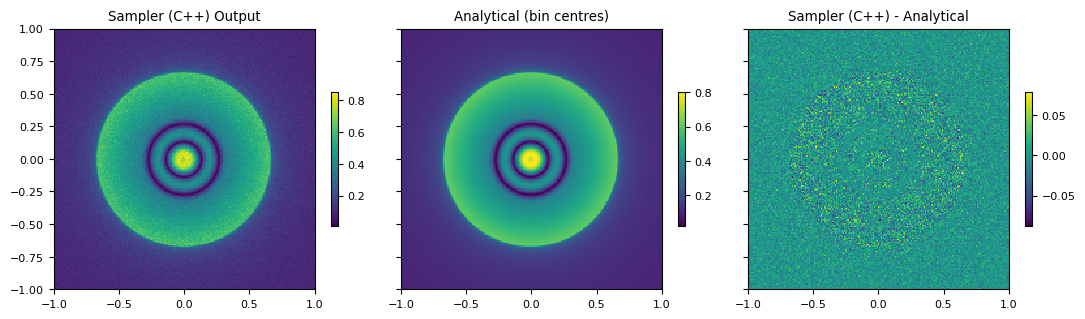

In [7]:
extent = 1
test_2d(
    cpp_pdf_name="freehand2",
    xlim=(-extent, extent),
    ylim=(-extent, extent),
    width=2.0,
    N=int(1e7),
    seed=1,
)
plt.gcf().tight_layout()